# A5: Extension Studies

New York County is mostly Manhattan, New York City, which is the most densely populated and geographically smallest of the five boroughs of New York City, which is also probably the most densely populated and economically developed region in the United States. Sitting in the nation’s largest metropolitan area, New York County has the nation’s largest subway system and the highest annual ridership. We know that subway is also a main form of public transportation. Therefore, I am curious to learn how the outbreak of COVID-19 and the city’s mask-wearing policy change people’s behavior patterns in using the subway system in New York County. 

* Research question: How is the frequency of people using the New York City subway system influenced by the pandemic and the county’s mask-wearing policy?
* Hypothesis: People use the New York City subway system less when there are more confirmed cases and when mask-wearing is not required. 

Import libraries

In [77]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in the dataset

In [69]:
df = pd.read_csv("raw/NYC_subway_traffic_2017-2021.csv")
df.head()

,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
0,1,2017-02-04 04:00:00,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0
1,2,2017-02-04 04:00:00,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0
2,3,2017-02-04 04:00:00,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0
3,10,2017-02-04 04:00:00,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0
4,11,2017-02-04 04:00:00,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0


Make a copy of the data and perform operation on that copy so we don't mess up with the original data.

In [70]:
df1 = df.copy()

## Data Processing

Change datetime from yyyy-mm-dd hh:mm:ss to yyyy-mm-dd format so later we can count the number of records each day

In [71]:
# remove time, only keep date
df1['Datetime'] = pd.to_datetime(df['Datetime']).dt.date
df1

,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
0,1,2017-02-04,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0
1,2,2017-02-04,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0
2,3,2017-02-04,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0
3,10,2017-02-04,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0
4,11,2017-02-04,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13,5 Av/53 St,R015,Queens Blvd,EM,EM,Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.760167,-73.975224,1182.0,646.0
4589376,114,2021-08-13,5 Av/59 St,R079,Astoria,NQR,NWR,Queens,Downtown Brooklyn,BMT,Subway,M,Upper West Side,40.764811,-73.973347,1274.0,445.0
4589377,310,2021-08-13,Fulton St,R028,"Clark St, Lexington Av",2345ACJZ,2345,Uptown Bronx Uptown Bronx,Downtown Brooklyn Downtown Brooklyn,IRT,Subway,M,Financial District,40.709892,-74.008040,433.0,549.0
4589378,311,2021-08-13,Fulton St,R028,Jamaica,ACJZ2345,JZ,Brooklyn,Broad St,BMT,Subway,M,Financial District,40.710374,-74.007582,491.0,844.0


In [72]:
# rename column "datetime" to "date"
df1 = df1.rename(columns={'Datetime': 'Date'})
df1

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
0,1,2017-02-04,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0
1,2,2017-02-04,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0
2,3,2017-02-04,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0
3,10,2017-02-04,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0
4,11,2017-02-04,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13,5 Av/53 St,R015,Queens Blvd,EM,EM,Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.760167,-73.975224,1182.0,646.0
4589376,114,2021-08-13,5 Av/59 St,R079,Astoria,NQR,NWR,Queens,Downtown Brooklyn,BMT,Subway,M,Upper West Side,40.764811,-73.973347,1274.0,445.0
4589377,310,2021-08-13,Fulton St,R028,"Clark St, Lexington Av",2345ACJZ,2345,Uptown Bronx Uptown Bronx,Downtown Brooklyn Downtown Brooklyn,IRT,Subway,M,Financial District,40.709892,-74.008040,433.0,549.0
4589378,311,2021-08-13,Fulton St,R028,Jamaica,ACJZ2345,JZ,Brooklyn,Broad St,BMT,Subway,M,Financial District,40.710374,-74.007582,491.0,844.0


## Question 1: How is the overall subway ridership related to daily confirmed cases?

Count all ridership record for each single date.
A ridership is defined as a record when a passenger swipes into the subway system and swipes out of the subway system, regardless the length of time they utilize the system nor the mileage they traveled.

In [73]:
a=df1.groupby("Date").size().values
df1= df1.drop_duplicates(subset="Date").assign(Count=a)
df1

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
0,1,2017-02-04,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0,2061
2061,0,2017-02-05,1 Av,R248,Canarsie,L,L,8 Av,Brooklyn,BMT,Subway,M,Lower East Side/Chinatown,40.730953,-73.981628,2474.0,1854.0,2775
4836,0,2017-02-06,1 Av,R248,Canarsie,L,L,8 Av,Brooklyn,BMT,Subway,M,Lower East Side/Chinatown,40.730953,-73.981628,1323.0,1199.0,2752
7588,0,2017-02-07,1 Av,R248,Canarsie,L,L,8 Av,Brooklyn,BMT,Subway,M,Lower East Side/Chinatown,40.730953,-73.981628,1250.0,1413.0,2734
10322,0,2017-02-08,1 Av,R248,Canarsie,L,L,8 Av,Brooklyn,BMT,Subway,M,Lower East Side/Chinatown,40.730953,-73.981628,1556.0,1398.0,2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575897,0,2021-08-09,1 Av,R248,Canarsie,L,L,8 Av,Brooklyn,BMT,Subway,M,Lower East Side/Chinatown,40.730953,-73.981628,260.0,324.0,2794
4578691,0,2021-08-10,1 Av,R248,Canarsie,L,L,8 Av,Brooklyn,BMT,Subway,M,Lower East Side/Chinatown,40.730953,-73.981628,239.0,359.0,2789
4581480,0,2021-08-11,1 Av,R248,Canarsie,L,L,8 Av,Brooklyn,BMT,Subway,M,Lower East Side/Chinatown,40.730953,-73.981628,261.0,326.0,2782
4584262,0,2021-08-12,1 Av,R248,Canarsie,L,L,8 Av,Brooklyn,BMT,Subway,M,Lower East Side/Chinatown,40.730953,-73.981628,313.0,441.0,2787


Keep only the information we need which is date and ridership count, drop the others

In [74]:
pop = df1[['Date','Count']]
pop

,Date,Count
0,2017-02-04,2061
2061,2017-02-05,2775
4836,2017-02-06,2752
7588,2017-02-07,2734
10322,2017-02-08,2741
...,...,...
4575897,2021-08-09,2794
4578691,2021-08-10,2789
4581480,2021-08-11,2782
4584262,2021-08-12,2787


Reset the index

In [75]:
pop2 = pop.reset_index()
pop2 = pop2.drop('index', 1)
pop2

,Date,Count
0,2017-02-04,2061
1,2017-02-05,2775
2,2017-02-06,2752
3,2017-02-07,2734
4,2017-02-08,2741
...,...,...
1647,2021-08-09,2794
1648,2021-08-10,2789
1649,2021-08-11,2782
1650,2021-08-12,2787


Save the data to a new csv file for reference.

In [81]:
pop2.to_csv("rideship_popularity.csv")

Read the cleaned and combined data we got from A4. This information is needed because we want to observe the corelation between information such as confirmed cases and subway ridership.

In [80]:
a4 = pd.read_csv("a4_data.csv")
a4.head()

,Unnamed: 0,FIPS,Combined_Key,date,Cumulative_Cases,State_Tribe_Territory,County_Name,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,Daily_Cases,Slop,Total_Population,Susceptible_Population,Infection_Rate,7Day_Average_Cases,Infection_Rate_Smooth
0,0,36061.0,"New York, New York, US",2020-02-01,0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1694251,1694251,NaN,NaN,NaN
1,1,36061.0,"New York, New York, US",2020-02-02,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.0,NaN,NaN
2,2,36061.0,"New York, New York, US",2020-02-03,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.0,NaN,NaN
3,3,36061.0,"New York, New York, US",2020-02-04,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.0,NaN,NaN
4,4,36061.0,"New York, New York, US",2020-02-05,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.0,NaN,NaN


Rename the a4 column to make it match with the ridership data so we can later join the tables together.

In [84]:
a4 = a4.rename(columns={'date': 'Date'})
a4

,Unnamed: 0,FIPS,Combined_Key,Date,Cumulative_Cases,State_Tribe_Territory,County_Name,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,Daily_Cases,Slop,Total_Population,Susceptible_Population,Infection_Rate,7Day_Average_Cases,Infection_Rate_Smooth
0,0,36061.0,"New York, New York, US",2020-02-01,0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1694251,1694251,NaN,NaN,NaN
1,1,36061.0,"New York, New York, US",2020-02-02,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN
2,2,36061.0,"New York, New York, US",2020-02-03,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN
3,3,36061.0,"New York, New York, US",2020-02-04,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN
4,4,36061.0,"New York, New York, US",2020-02-05,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,618,36061.0,"New York, New York, US",2021-10-11,166253,NaN,NaN,NaN,False,NaN,NaN,NaN,240.0,240.0,1694251,1527998,0.015707,219.000000,0.014332
619,619,36061.0,"New York, New York, US",2021-10-12,166413,NaN,NaN,NaN,False,NaN,NaN,NaN,160.0,160.0,1694251,1527838,0.010472,212.714286,0.013923
620,620,36061.0,"New York, New York, US",2021-10-13,166586,NaN,NaN,NaN,False,NaN,NaN,NaN,173.0,173.0,1694251,1527665,0.011324,207.000000,0.013550
621,621,36061.0,"New York, New York, US",2021-10-14,166797,NaN,NaN,NaN,False,NaN,NaN,NaN,211.0,211.0,1694251,1527454,0.013814,198.857143,0.013019


The ridership data contains record as earler as on 2017-02-04. But data that earlier is not helpful in our COVID analysis as that's long before COVID has started.

In [106]:
pop3 = pop2.loc[(pop2['Date'] >= pd.to_datetime('2020-02-01').date())].reset_index().drop(['index'], axis = 1)
pop3

,Date,Count
0,2020-02-01,2814
1,2020-02-02,2812
2,2020-02-03,2769
3,2020-02-04,2757
4,2020-02-05,2760
...,...,...
555,2021-08-09,2794
556,2021-08-10,2789
557,2021-08-11,2782
558,2021-08-12,2787


Merge the ridership data with A4 data

In [129]:
comb = a4.merge(pop3, how = 'left', on = ['Date'])
comb

,Unnamed: 0,FIPS,Combined_Key,Date,Cumulative_Cases,State_Tribe_Territory,County_Name,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,Daily_Cases,Slop,Total_Population,Susceptible_Population,Infection_Rate,7Day_Average_Cases,Infection_Rate_Smooth,Count
0,0,36061.0,"New York, New York, US",2020-02-01,0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1694251,1694251,NaN,NaN,NaN,NaN
1,1,36061.0,"New York, New York, US",2020-02-02,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN,NaN
2,2,36061.0,"New York, New York, US",2020-02-03,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN,NaN
3,3,36061.0,"New York, New York, US",2020-02-04,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN,NaN
4,4,36061.0,"New York, New York, US",2020-02-05,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,618,36061.0,"New York, New York, US",2021-10-11,166253,NaN,NaN,NaN,False,NaN,NaN,NaN,240.0,240.0,1694251,1527998,0.015707,219.000000,0.014332,NaN
619,619,36061.0,"New York, New York, US",2021-10-12,166413,NaN,NaN,NaN,False,NaN,NaN,NaN,160.0,160.0,1694251,1527838,0.010472,212.714286,0.013923,NaN
620,620,36061.0,"New York, New York, US",2021-10-13,166586,NaN,NaN,NaN,False,NaN,NaN,NaN,173.0,173.0,1694251,1527665,0.011324,207.000000,0.013550,NaN
621,621,36061.0,"New York, New York, US",2021-10-14,166797,NaN,NaN,NaN,False,NaN,NaN,NaN,211.0,211.0,1694251,1527454,0.013814,198.857143,0.013019,NaN


In [130]:
comb['Count'] = pop3['Count']
comb

,Unnamed: 0,FIPS,Combined_Key,Date,Cumulative_Cases,State_Tribe_Territory,County_Name,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,Daily_Cases,Slop,Total_Population,Susceptible_Population,Infection_Rate,7Day_Average_Cases,Infection_Rate_Smooth,Count
0,0,36061.0,"New York, New York, US",2020-02-01,0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1694251,1694251,NaN,NaN,NaN,2814.0
1,1,36061.0,"New York, New York, US",2020-02-02,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN,2812.0
2,2,36061.0,"New York, New York, US",2020-02-03,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN,2769.0
3,3,36061.0,"New York, New York, US",2020-02-04,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN,2757.0
4,4,36061.0,"New York, New York, US",2020-02-05,0,NaN,NaN,NaN,False,NaN,NaN,NaN,0.0,0.0,1694251,1694251,0.000000,NaN,NaN,2760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,618,36061.0,"New York, New York, US",2021-10-11,166253,NaN,NaN,NaN,False,NaN,NaN,NaN,240.0,240.0,1694251,1527998,0.015707,219.000000,0.014332,NaN
619,619,36061.0,"New York, New York, US",2021-10-12,166413,NaN,NaN,NaN,False,NaN,NaN,NaN,160.0,160.0,1694251,1527838,0.010472,212.714286,0.013923,NaN
620,620,36061.0,"New York, New York, US",2021-10-13,166586,NaN,NaN,NaN,False,NaN,NaN,NaN,173.0,173.0,1694251,1527665,0.011324,207.000000,0.013550,NaN
621,621,36061.0,"New York, New York, US",2021-10-14,166797,NaN,NaN,NaN,False,NaN,NaN,NaN,211.0,211.0,1694251,1527454,0.013814,198.857143,0.013019,NaN


Plot the visualization for relationship between daily confirmed cases and subway ridership on each day

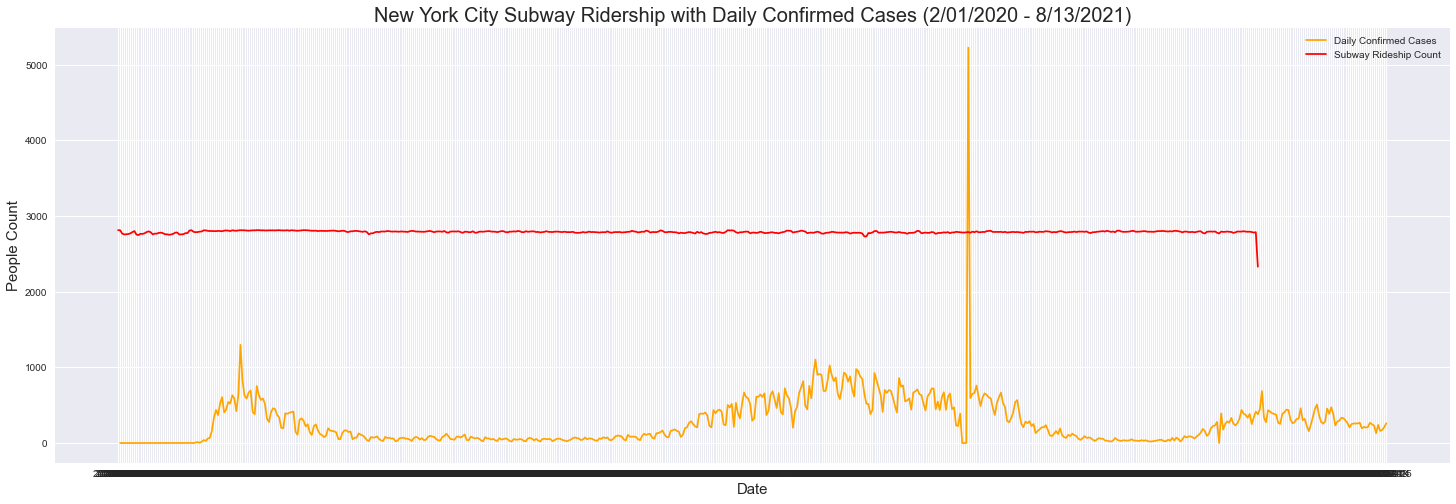

In [288]:
plt.figure(figsize=(25,8))

plt.plot(comb['Date'], comb['Daily_Cases'], color = 'orange', label = 'Daily Confirmed Cases')
plt.plot(comb['Date'], comb['Count'], color = 'red', label = 'Subway Rideship Count')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('People Count', fontsize = 15)
plt.title('New York City Subway Ridership with Daily Confirmed Cases (2/01/2020 - 8/13/2021)', fontsize = 20)

plt.legend()
plt.show()

We can observe that the overall subway ridership is not correlated with daily confirmed cases.

## Quetion 2: How is the overall subway ridership related to the public mask-wearing policy?

filter the data only after the specific date

In [177]:
pop4 = pop2.loc[(pop2['Date'] >= pd.to_datetime('2020-01-01').date())].reset_index().drop(['index'], axis = 1)
pop4

,Date,Count
0,2020-01-01,2814
1,2020-01-02,2780
2,2020-01-03,2785
3,2020-01-04,2811
4,2020-01-05,2810
...,...,...
586,2021-08-09,2794
587,2021-08-10,2789
588,2021-08-11,2782
589,2021-08-12,2787


Plot the visualization and mark the key dates.

No handles with labels found to put in legend.


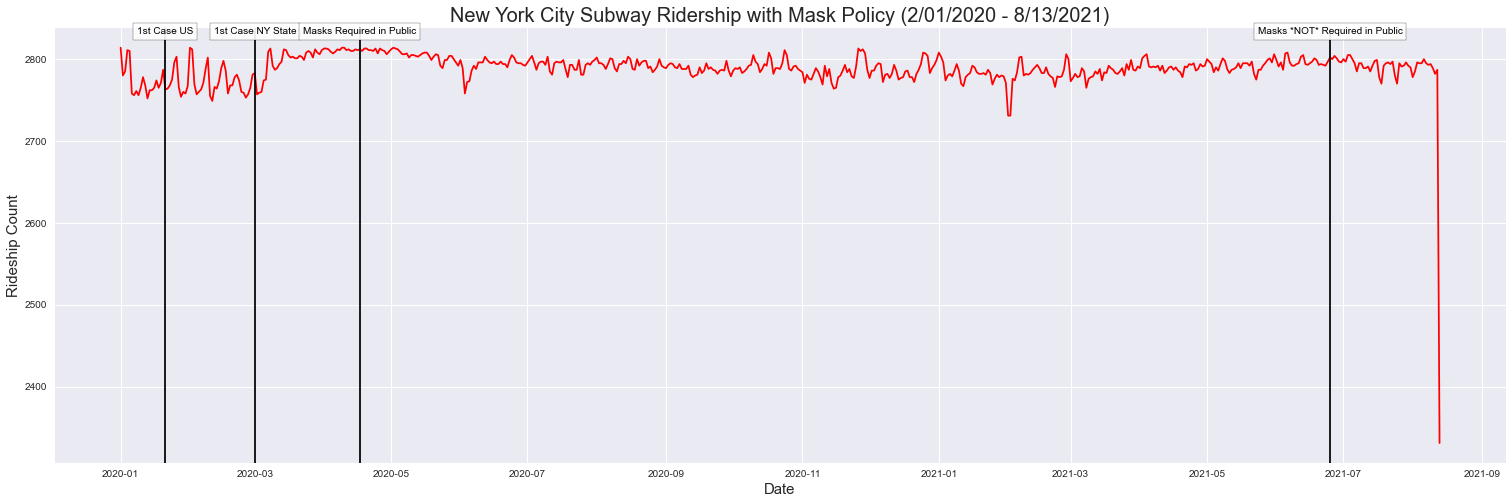

In [289]:
plt.figure(figsize=(26,8))

plt.plot(pop4['Date'], pop4['Count'], color = 'red')


plt.xlabel('Date', fontsize = 15)
plt.ylabel('Rideship Count', fontsize = 15)
plt.title('New York City Subway Ridership with Mask Policy (2/01/2020 - 8/13/2021)', fontsize = 20)

plt.legend()

label_list = [
    (pd.to_datetime("2020-01-21"), '1st Case US', 'black'),
    (pd.to_datetime("2020-03-01"), '1st Case NY State', 'black'),
    (pd.to_datetime("2020-04-17"), 'Masks Required in Public', 'black'),
    (pd.to_datetime("2021-06-25"), 'Masks *NOT* Required in Public', 'black')
    
]

ax = plt.gca()

for date_point, label, clr in label_list:
    plt.axvline(x=date_point, color=clr)
    plt.text(date_point, ax.get_ylim()[1]-4, label,
             horizontalalignment='center',
             verticalalignment='center',
             color=clr,
             bbox=dict(facecolor='white', alpha=0.9))

plt.show()

We can observe that there has been some fluctuation in subway ridership during the pandemic time, but it is hard to say that there is a relationship between the ridership and mask wearing policy.

## Question 3: How do the stop popularities change during the pandemic? The most popular stops? Less popular stops?

Make a copy of the data to prevent we mess up

In [233]:
df2 = df.copy()
df2

,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
0,1,2017-02-04 04:00:00,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0
1,2,2017-02-04 04:00:00,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0
2,3,2017-02-04 04:00:00,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0
3,10,2017-02-04 04:00:00,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0
4,11,2017-02-04 04:00:00,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13 20:00:00,5 Av/53 St,R015,Queens Blvd,EM,EM,Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.760167,-73.975224,1182.0,646.0
4589376,114,2021-08-13 20:00:00,5 Av/59 St,R079,Astoria,NQR,NWR,Queens,Downtown Brooklyn,BMT,Subway,M,Upper West Side,40.764811,-73.973347,1274.0,445.0
4589377,310,2021-08-13 20:00:00,Fulton St,R028,"Clark St, Lexington Av",2345ACJZ,2345,Uptown Bronx Uptown Bronx,Downtown Brooklyn Downtown Brooklyn,IRT,Subway,M,Financial District,40.709892,-74.008040,433.0,549.0
4589378,311,2021-08-13 20:00:00,Fulton St,R028,Jamaica,ACJZ2345,JZ,Brooklyn,Broad St,BMT,Subway,M,Financial District,40.710374,-74.007582,491.0,844.0


convert column in df2 to datetime format

In [234]:
df2['Datetime'] = pd.to_datetime(df2['Datetime']).dt.date
df2

,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
0,1,2017-02-04,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0
1,2,2017-02-04,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0
2,3,2017-02-04,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0
3,10,2017-02-04,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0
4,11,2017-02-04,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13,5 Av/53 St,R015,Queens Blvd,EM,EM,Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.760167,-73.975224,1182.0,646.0
4589376,114,2021-08-13,5 Av/59 St,R079,Astoria,NQR,NWR,Queens,Downtown Brooklyn,BMT,Subway,M,Upper West Side,40.764811,-73.973347,1274.0,445.0
4589377,310,2021-08-13,Fulton St,R028,"Clark St, Lexington Av",2345ACJZ,2345,Uptown Bronx Uptown Bronx,Downtown Brooklyn Downtown Brooklyn,IRT,Subway,M,Financial District,40.709892,-74.008040,433.0,549.0
4589378,311,2021-08-13,Fulton St,R028,Jamaica,ACJZ2345,JZ,Brooklyn,Broad St,BMT,Subway,M,Financial District,40.710374,-74.007582,491.0,844.0


Rename the "datetime" column to "date"

In [235]:
df2 = df2.rename(columns={'Datetime': 'Date'})

Select only rows for time square

In [236]:
times_sq = df2.loc[df2['Stop Name'] == 'Times Sq - 42 St']
times_sq

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
641,440,2017-02-04,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,354.0,740.0
642,441,2017-02-04,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",ACENQRS1237,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,347.0,1128.0
643,442,2017-02-04,Times Sq - 42 St,R032,Broadway - Brighton,1237ACENQRS,NQRW,Uptown Queens,Downtown Brooklyn,BMT,Subway,M,Clinton/Chelsea,40.754672,-73.986754,382.0,1593.0
644,443,2017-02-04,Times Sq - 42 St,R033,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,1962.0,2615.0
1104,440,2017-02-04,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,634.0,2128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588881,443,2021-08-13,Times Sq - 42 St,R033,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,2712.0,3470.0
4589345,440,2021-08-13,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,917.0,1987.0
4589346,441,2021-08-13,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",ACENQRS1237,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,1242.0,1350.0
4589347,442,2021-08-13,Times Sq - 42 St,R032,Broadway - Brighton,1237ACENQRS,NQRW,Uptown Queens,Downtown Brooklyn,BMT,Subway,M,Clinton/Chelsea,40.754672,-73.986754,1347.0,1856.0


### Select the top 3 popular stops

First select rows that matches the stop names

In [237]:
grand_central = df2.loc[df2['Stop Name'] == 'Grand Central - 42 St']
grand_central

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
137,317,2017-02-04,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,40.0,144.0
138,319,2017-02-04,Grand Central - 42 St,R047,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,410.0,531.0
139,320,2017-02-04,Grand Central - 42 St,R048,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,209.0,164.0
525,317,2017-02-04,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,794.0,1166.0
526,318,2017-02-04,Grand Central - 42 St,R046,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,2865.0,3818.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588759,320,2021-08-13,Grand Central - 42 St,R048,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,432.0,760.0
4589223,317,2021-08-13,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,767.0,951.0
4589224,318,2021-08-13,Grand Central - 42 St,R046,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,5356.0,6583.0
4589225,319,2021-08-13,Grand Central - 42 St,R047,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,3462.0,3573.0


In [238]:
# 34 St - Herald
herald_sq = df2.loc[df2['Stop Name'] == '34 St - Herald Sq']
herald_sq

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
303,92,2017-02-04,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,1886.0,4611.0
304,93,2017-02-04,34 St - Herald Sq,R022,Broadway - Brighton,BDFMNQR,NQRW,Uptown Queens,Downtown Brooklyn,BMT,Subway,M,Clinton/Chelsea,40.749567,-73.987950,338.0,676.0
305,94,2017-02-04,34 St - Herald Sq,R023,Broadway - Brighton,BDFMNQR,NQRW,Uptown Queens,Downtown Brooklyn,BMT,Subway,M,Clinton/Chelsea,40.749567,-73.987950,858.0,2245.0
762,92,2017-02-04,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,6534.0,8319.0
763,93,2017-02-04,34 St - Herald Sq,R022,Broadway - Brighton,BDFMNQR,NQRW,Uptown Queens,Downtown Brooklyn,BMT,Subway,M,Clinton/Chelsea,40.749567,-73.987950,1752.0,1785.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588532,93,2021-08-13,34 St - Herald Sq,R022,Broadway - Brighton,BDFMNQR,NQRW,Uptown Queens,Downtown Brooklyn,BMT,Subway,M,Clinton/Chelsea,40.749567,-73.987950,884.0,1178.0
4588533,94,2021-08-13,34 St - Herald Sq,R023,Broadway - Brighton,BDFMNQR,NQRW,Uptown Queens,Downtown Brooklyn,BMT,Subway,M,Clinton/Chelsea,40.749567,-73.987950,1774.0,3379.0
4588998,92,2021-08-13,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,5534.0,5989.0
4588999,93,2021-08-13,34 St - Herald Sq,R022,Broadway - Brighton,BDFMNQR,NQRW,Uptown Queens,Downtown Brooklyn,BMT,Subway,M,Clinton/Chelsea,40.749567,-73.987950,1529.0,1189.0


#### Times Sq

Calculate ridership count for each stop

In [239]:
a = times_sq.groupby("Date").size().values
times_sq = times_sq.drop_duplicates(subset="Date").assign(Count=a)
times_sq

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
641,440,2017-02-04,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,354.0,740.0,16
2494,440,2017-02-05,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,477.0,669.0,24
5252,440,2017-02-06,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,347.0,338.0,23
7991,440,2017-02-07,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,546.0,434.0,22
10730,440,2017-02-08,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,713.0,443.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576323,440,2021-08-09,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,147.0,315.0,24
4579116,440,2021-08-10,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,162.0,289.0,24
4581899,440,2021-08-11,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,117.0,287.0,24
4584686,440,2021-08-12,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,165.0,301.0,24


filter the data for time after 2020-02-01

In [240]:
times_sq = times_sq.loc[(times_sq['Date'] >= pd.to_datetime('2020-02-01').date())].reset_index().drop(['index'], axis = 1)
times_sq

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
0,440,2020-02-01,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,723.0,700.0,24
1,440,2020-02-02,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,553.0,748.0,24
2,440,2020-02-03,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,358.0,413.0,22
3,440,2020-02-04,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,513.0,433.0,22
4,440,2020-02-05,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,578.0,393.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,440,2021-08-09,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,147.0,315.0,24
556,440,2021-08-10,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,162.0,289.0,24
557,440,2021-08-11,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,117.0,287.0,24
558,440,2021-08-12,Times Sq - 42 St,R032,"Broadway - 7Av, Flushing, Lexington - Shuttle",1237ACENQRS,1237S,Uptown Bronx Queens,Downtown Brooklyn 34 St - Hudson Yards Grand C...,IRT,Subway,M,Clinton/Chelsea,40.755583,-73.987138,165.0,301.0,24


Rename count column name

In [241]:
times_sq = times_sq[['Date','Count']]
times_sq = times_sq.rename(columns={'Count': 'Times Sq Count'})
times_sq

,Date,Times Sq Count
0,2020-02-01,24
1,2020-02-02,24
2,2020-02-03,22
3,2020-02-04,22
4,2020-02-05,22
...,...,...
555,2021-08-09,24
556,2021-08-10,24
557,2021-08-11,24
558,2021-08-12,24


#### Grand Central

In [242]:
a = grand_central.groupby("Date").size().values
grand_central = grand_central.drop_duplicates(subset="Date").assign(Count=a)
grand_central

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
137,317,2017-02-04,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,40.0,144.0,19
2375,317,2017-02-05,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,312.0,721.0,24
5137,317,2017-02-06,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,118.0,183.0,24
7883,318,2017-02-07,Grand Central - 42 St,R046,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,3238.0,1010.0,23
10617,318,2017-02-08,Grand Central - 42 St,R046,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,3661.0,1078.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576200,317,2021-08-09,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,27.0,67.0,24
4578997,317,2021-08-10,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,20.0,52.0,24
4581782,317,2021-08-11,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,25.0,82.0,24
4584566,317,2021-08-12,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,43.0,83.0,24


In [243]:
grand_central = grand_central.loc[(grand_central['Date'] >= pd.to_datetime('2020-02-01').date())].reset_index().drop(['index'], axis = 1)
grand_central

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
0,317,2020-02-01,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,141.0,313.0,24
1,317,2020-02-02,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,4.0,4.0,24
2,317,2020-02-03,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,17.0,8.0,24
3,317,2020-02-04,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,60.0,77.0,24
4,317,2020-02-05,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,58.0,70.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,317,2021-08-09,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,27.0,67.0,24
556,317,2021-08-10,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,20.0,52.0,24
557,317,2021-08-11,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,25.0,82.0,24
558,317,2021-08-12,Grand Central - 42 St,R045,"Lexington Av, Flushing, Lexington - Shuttle",4567S,4567S,Uptown Bronx Queens Times Sq,Downtown Brooklyn 34 St - Hudson Yards,IRT,Subway,M,Stuyvesant Town/Turtle Bay,40.751992,-73.977359,43.0,83.0,24


Select only the useful columns and rename the column "count"

In [244]:
grand_central = grand_central[['Date','Count']]
grand_central = grand_central.rename(columns={'Count': 'Grand Central Count'})
grand_central

,Date,Grand Central Count
0,2020-02-01,24
1,2020-02-02,24
2,2020-02-03,24
3,2020-02-04,24
4,2020-02-05,24
...,...,...
555,2021-08-09,24
556,2021-08-10,24
557,2021-08-11,24
558,2021-08-12,24


#### Herald Sq

In [245]:
a = herald_sq.groupby("Date").size().values
herald_sq = herald_sq.drop_duplicates(subset="Date").assign(Count=a)
herald_sq

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
303,92,2017-02-04,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,1886.0,4611.0,12
2153,92,2017-02-05,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,3636.0,1872.0,18
4925,92,2017-02-06,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,2077.0,1173.0,17
7674,92,2017-02-07,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,2913.0,1010.0,17
10410,92,2017-02-08,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,2940.0,1075.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575983,92,2021-08-09,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,508.0,437.0,18
4578778,92,2021-08-10,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,463.0,371.0,18
4581565,92,2021-08-11,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,373.0,306.0,18
4584349,92,2021-08-12,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,627.0,481.0,18


In [246]:
herald_sq = herald_sq.loc[(herald_sq['Date'] >= pd.to_datetime('2020-02-01').date())].reset_index().drop(['index'], axis = 1)
herald_sq

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
0,92,2020-02-01,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,3279.0,1682.0,18
1,92,2020-02-02,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,2794.0,1709.0,18
2,92,2020-02-03,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,1641.0,977.0,17
3,92,2020-02-04,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,2581.0,1022.0,17
4,92,2020-02-05,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,2596.0,1096.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,92,2021-08-09,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,508.0,437.0,18
556,92,2021-08-10,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,463.0,371.0,18
557,92,2021-08-11,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,373.0,306.0,18
558,92,2021-08-12,34 St - Herald Sq,R022,6th Av - Culver,BDFMNQR,BDFM,Uptown Bronx - Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.749719,-73.987823,627.0,481.0,18


Join count with date for all three stops and form a table

In [247]:
herald_sq = herald_sq[['Date','Count']]
herald_sq = herald_sq.rename(columns={'Count': 'Herald Sq Count'})
herald_sq

,Date,Herald Sq Count
0,2020-02-01,18
1,2020-02-02,18
2,2020-02-03,17
3,2020-02-04,17
4,2020-02-05,17
...,...,...
555,2021-08-09,18
556,2021-08-10,18
557,2021-08-11,18
558,2021-08-12,18


Join the tables together

In [248]:
m = times_sq.merge(grand_central, how = 'right', on = ['Date'])
m

,Date,Times Sq Count,Grand Central Count
0,2020-02-01,24,24
1,2020-02-02,24,24
2,2020-02-03,22,24
3,2020-02-04,22,24
4,2020-02-05,22,24
...,...,...,...
555,2021-08-09,24,24
556,2021-08-10,24,24
557,2021-08-11,24,24
558,2021-08-12,24,24


In [249]:
m = m.merge(herald_sq, how = 'right', on = ['Date'])
m

,Date,Times Sq Count,Grand Central Count,Herald Sq Count
0,2020-02-01,24,24,18
1,2020-02-02,24,24,18
2,2020-02-03,22,24,17
3,2020-02-04,22,24,17
4,2020-02-05,22,24,17
...,...,...,...,...
555,2021-08-09,24,24,18
556,2021-08-10,24,24,18
557,2021-08-11,24,24,18
558,2021-08-12,24,24,18


Select a representative stop that I know: Wall Street
Do the similar operation

In [255]:
ws = df2.loc[df2['Stop Name'] == 'Wall St']
ws

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
203,456,2017-02-04,Wall St,R043,Lexington Av,45,45,Uptown Bronx,Downtown Brooklyn,IRT,Subway,M,Financial District,40.707557,-74.011862,16.0,15.0
656,455,2017-02-04,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,665.0,1833.0
657,456,2017-02-04,Wall St,R043,Lexington Av,45,45,Uptown Bronx,Downtown Brooklyn,IRT,Subway,M,Financial District,40.707557,-74.011862,4.0,4.0
1119,455,2017-02-04,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,1972.0,2197.0
1120,456,2017-02-04,Wall St,R043,Lexington Av,45,45,Uptown Bronx,Downtown Brooklyn,IRT,Subway,M,Financial District,40.707557,-74.011862,17.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588893,455,2021-08-13,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,959.0,1744.0
4588894,456,2021-08-13,Wall St,R043,Lexington Av,45,45,Uptown Bronx,Downtown Brooklyn,IRT,Subway,M,Financial District,40.707557,-74.011862,711.0,801.0
4589360,455,2021-08-13,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,1722.0,1129.0
4589361,456,2021-08-13,Wall St,R043,Lexington Av,45,45,Uptown Bronx,Downtown Brooklyn,IRT,Subway,M,Financial District,40.707557,-74.011862,1730.0,845.0


In [256]:
# get the popularity data for wall street stop
a4 = ws.groupby("Date").size().values
ws = ws.drop_duplicates(subset="Date").assign(Count=a4)
ws

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
203,456,2017-02-04,Wall St,R043,Lexington Av,45,45,Uptown Bronx,Downtown Brooklyn,IRT,Subway,M,Financial District,40.707557,-74.011862,16.0,15.0,9
2509,455,2017-02-05,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,637.0,624.0,12
5267,455,2017-02-06,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,505.0,719.0,12
8005,455,2017-02-07,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,790.0,535.0,12
10745,455,2017-02-08,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,859.0,577.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576338,455,2021-08-09,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,107.0,220.0,12
4579130,455,2021-08-10,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,107.0,104.0,12
4581913,455,2021-08-11,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,86.0,131.0,12
4584700,455,2021-08-12,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.009100,112.0,132.0,12


In [257]:
# filter data based on date
ws = ws.loc[(ws['Date'] >= pd.to_datetime('2020-02-01').date())].reset_index().drop(['index'], axis = 1)
ws

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
0,455,2020-02-01,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.0091,709.0,630.0,12
1,455,2020-02-02,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.0091,611.0,673.0,12
2,455,2020-02-03,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.0091,424.0,631.0,12
3,455,2020-02-04,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.0091,504.0,487.0,12
4,455,2020-02-05,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.0091,567.0,457.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,455,2021-08-09,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.0091,107.0,220.0,12
556,455,2021-08-10,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.0091,107.0,104.0,12
557,455,2021-08-11,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.0091,86.0,131.0,12
558,455,2021-08-12,Wall St,R027,Clark St,23,23,Uptown Bronx,Brooklyn,IRT,Subway,M,Financial District,40.706821,-74.0091,112.0,132.0,12


In [258]:
# select only the useful data and rename count column
ws = ws[['Date','Count']]
ws = ws.rename(columns={'Count': 'Wall St Count'})
ws

,Date,Wall St Count
0,2020-02-01,12
1,2020-02-02,12
2,2020-02-03,12
3,2020-02-04,12
4,2020-02-05,12
...,...,...
555,2021-08-09,12
556,2021-08-10,12
557,2021-08-11,12
558,2021-08-12,12


In [259]:
# merge the wall street count to table m
m = m.merge(ws, how = 'right', on = ['Date'])
m

,Date,Times Sq Count,Grand Central Count,Herald Sq Count,Wall St Count
0,2020-02-01,24,24,18,12
1,2020-02-02,24,24,18,12
2,2020-02-03,22,24,17,12
3,2020-02-04,22,24,17,12
4,2020-02-05,22,24,17,12
...,...,...,...,...,...
555,2021-08-09,24,24,18,12
556,2021-08-10,24,24,18,12
557,2021-08-11,24,24,18,12
558,2021-08-12,24,24,18,12


### Select 3 less popoular stops

#### Flushing Av

In [260]:
# select all rows that contains keyword 'flushing av'
fs = df2.loc[df2['Stop Name'] == 'Flushing Av']
fs

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
122,296,2017-02-04,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,71.0,100.0
123,297,2017-02-04,Flushing Av,R377,Jamaica,JM,JM,Jamaica - Middle Village,Manhattan,BMT,Elevated,Bk,Bushwick,40.700260,-73.941126,171.0,126.0
504,296,2017-02-04,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,219.0,161.0
505,297,2017-02-04,Flushing Av,R377,Jamaica,JM,JM,Jamaica - Middle Village,Manhattan,BMT,Elevated,Bk,Bushwick,40.700260,-73.941126,680.0,291.0
966,296,2017-02-04,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,338.0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588269,297,2021-08-13,Flushing Av,R377,Jamaica,JM,JM,Jamaica - Middle Village,Manhattan,BMT,Elevated,Bk,Bushwick,40.700260,-73.941126,668.0,757.0
4588735,296,2021-08-13,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,262.0,268.0
4588736,297,2021-08-13,Flushing Av,R377,Jamaica,JM,JM,Jamaica - Middle Village,Manhattan,BMT,Elevated,Bk,Bushwick,40.700260,-73.941126,838.0,687.0
4589202,296,2021-08-13,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,524.0,367.0


In [261]:
# get the daily popularity count for flushing av
a5 = fs.groupby("Date").size().values
fs = fs.drop_duplicates(subset="Date").assign(Count=a5)
fs

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
122,296,2017-02-04,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,71.0,100.0,10
2354,296,2017-02-05,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,90.0,142.0,12
5118,296,2017-02-06,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,44.0,96.0,12
7864,296,2017-02-07,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,4.0,56.0,12
10598,296,2017-02-08,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,53.0,96.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576180,296,2021-08-09,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,23.0,99.0,12
4578976,296,2021-08-10,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,16.0,53.0,12
4581761,296,2021-08-11,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,25.0,47.0,12
4584546,296,2021-08-12,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,15.0,65.0,12


In [262]:
# filter the data based on date after 2020-02-01
fs = fs.loc[(fs['Date'] >= pd.to_datetime('2020-02-01').date())].reset_index().drop(['index'], axis = 1)
fs

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
0,296,2020-02-01,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,97.0,161.0,12
1,296,2020-02-02,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,120.0,162.0,12
2,296,2020-02-03,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,88.0,123.0,12
3,296,2020-02-04,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,54.0,53.0,12
4,296,2020-02-05,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,86.0,109.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,296,2021-08-09,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,23.0,99.0,12
556,296,2021-08-10,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,16.0,53.0,12
557,296,2021-08-11,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,25.0,47.0,12
558,296,2021-08-12,Flushing Av,R316,Crosstown,G,G,Queens,Church Av,IND,Subway,Bk,Bedford Stuyvesant,40.700377,-73.950234,15.0,65.0,12


In [263]:
# rename the count column name
fs = fs[['Date','Count']]
fs = fs.rename(columns={'Count': 'Flushing Av Count'})
fs

,Date,Flushing Av Count
0,2020-02-01,12
1,2020-02-02,12
2,2020-02-03,12
3,2020-02-04,12
4,2020-02-05,12
...,...,...
555,2021-08-09,12
556,2021-08-10,12
557,2021-08-11,12
558,2021-08-12,12


In [264]:
# merge flusing av data to table m
m = m.merge(fs, how = 'right', on = ['Date'])
m

,Date,Times Sq Count,Grand Central Count,Herald Sq Count,Wall St Count,Flushing Av Count
0,2020-02-01,24,24,18,12,12
1,2020-02-02,24,24,18,12,12
2,2020-02-03,22,24,17,12,12
3,2020-02-04,22,24,17,12,12
4,2020-02-05,22,24,17,12,12
...,...,...,...,...,...,...
555,2021-08-09,24,24,18,12,12
556,2021-08-10,24,24,18,12,12
557,2021-08-11,24,24,18,12,12
558,2021-08-12,24,24,18,12,12


#### Alabama Av

In [265]:
# find all rows that contains alabama av
alb = df2.loc[df2['Stop Name'] == 'Alabama Av']
alb

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
69,173,2017-02-04,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,143.0,146.0
384,173,2017-02-04,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,263.0,259.0
843,173,2017-02-04,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,336.0,353.0
1306,173,2017-02-04,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,371.0,392.0
1768,173,2017-02-04,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,318.0,333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587215,173,2021-08-13,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,45.0,58.0
4587678,173,2021-08-13,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,68.0,107.0
4588145,173,2021-08-13,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,237.0,415.0
4588612,173,2021-08-13,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,197.0,279.0


In [266]:
# count the daily popularity data for alabama av
a5 = alb.groupby("Date").size().values
alb = alb.drop_duplicates(subset="Date").assign(Count=a5)
alb

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
69,173,2017-02-04,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,143.0,146.0,5
2234,173,2017-02-05,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,142.0,156.0,6
5004,173,2017-02-06,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,71.0,98.0,6
7752,173,2017-02-07,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,64.0,122.0,6
10488,173,2017-02-08,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,86.0,127.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576060,173,2021-08-09,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,25.0,46.0,6
4578856,173,2021-08-10,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,42.0,79.0,6
4581641,173,2021-08-11,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,48.0,59.0,6
4584426,173,2021-08-12,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,37.0,56.0,6


In [268]:
# filter the data based on the dates
alb = alb.loc[(alb['Date'] >= pd.to_datetime('2020-02-01').date())].reset_index().drop(['index'], axis = 1)
alb

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
0,173,2020-02-01,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,110.0,188.0,6
1,173,2020-02-02,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,86.0,117.0,6
2,173,2020-02-03,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,40.0,68.0,6
3,173,2020-02-04,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,43.0,94.0,6
4,173,2020-02-05,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,67.0,113.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,173,2021-08-09,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,25.0,46.0,6
556,173,2021-08-10,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,42.0,79.0,6
557,173,2021-08-11,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,48.0,59.0,6
558,173,2021-08-12,Alabama Av,R433,Jamaica,J,J,Jamaica,Manhattan,BMT,Elevated,Bk,East New York/Starrett City,40.676992,-73.898654,37.0,56.0,6


In [269]:
# rename the count column
alb = alb[['Date','Count']]
alb = alb.rename(columns={'Count': 'Alabama Av Count'})
alb

,Date,Alabama Av Count
0,2020-02-01,6
1,2020-02-02,6
2,2020-02-03,6
3,2020-02-04,6
4,2020-02-05,6
...,...,...
555,2021-08-09,6
556,2021-08-10,6
557,2021-08-11,6
558,2021-08-12,6


In [270]:
# merge all popularity data to m
m = m.merge(alb, how = 'right', on = ['Date'])
m

,Date,Times Sq Count,Grand Central Count,Herald Sq Count,Wall St Count,Flushing Av Count,Alabama Av Count
0,2020-02-01,24,24,18,12,12,6
1,2020-02-02,24,24,18,12,12,6
2,2020-02-03,22,24,17,12,12,6
3,2020-02-04,22,24,17,12,12,6
4,2020-02-05,22,24,17,12,12,6
...,...,...,...,...,...,...,...
555,2021-08-09,24,24,18,12,12,6
556,2021-08-10,24,24,18,12,12,6
557,2021-08-11,24,24,18,12,12,6
558,2021-08-12,24,24,18,12,12,6


#### Forest Av

In [271]:
# find all rows that belong to forest av
forest = df2.loc[df2['Stop Name'] == 'Forest Av']
forest

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
124,300,2017-02-04,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,157.0,106.0
508,300,2017-02-04,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,451.0,123.0
970,300,2017-02-04,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,608.0,290.0
1431,300,2017-02-04,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,498.0,515.0
1895,300,2017-02-04,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,292.0,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587338,300,2021-08-13,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,7.0,137.0
4587805,300,2021-08-13,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,194.0,49.0
4588272,300,2021-08-13,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,822.0,157.0
4588739,300,2021-08-13,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,335.0,260.0


In [272]:
# get the popularity count for each day
a5 = forest.groupby("Date").size().values
forest = forest.drop_duplicates(subset="Date").assign(Count=a5)
forest

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
124,300,2017-02-04,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,157.0,106.0,5
2358,300,2017-02-05,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,87.0,279.0,6
5566,300,2017-02-06,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,796.0,69.0,5
8302,300,2017-02-07,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,803.0,120.0,5
11042,300,2017-02-08,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,838.0,114.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576650,300,2021-08-09,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,207.0,33.0,5
4578980,300,2021-08-10,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,10.0,88.0,6
4581765,300,2021-08-11,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,4.0,76.0,6
4585013,300,2021-08-12,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,222.0,45.0,5


In [274]:
# filter the date to match our range in a4
forest = forest.loc[(forest['Date'] >= pd.to_datetime('2020-02-01').date())].reset_index().drop(['index'], axis = 1)
forest

,Unique ID,Date,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Count
0,300,2020-02-01,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,67.0,492.0,6
1,300,2020-02-02,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,100.0,389.0,6
2,300,2020-02-03,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,715.0,93.0,5
3,300,2020-02-04,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,748.0,125.0,5
4,300,2020-02-05,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,787.0,157.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,300,2021-08-09,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,207.0,33.0,5
556,300,2021-08-10,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,10.0,88.0,6
557,300,2021-08-11,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,4.0,76.0,6
558,300,2021-08-12,Forest Av,R403,Myrtle Av,M,M,Manhattan,Metropolitan Av,BMT,Elevated,Q,Ridgewood/Maspeth,40.704423,-73.903077,222.0,45.0,5


In [275]:
# keep only the useful data for forest av to merge
forest = forest[['Date','Count']]
forest = forest.rename(columns={'Count': 'Forest Av Count'})
forest

,Date,Forest Av Count
0,2020-02-01,6
1,2020-02-02,6
2,2020-02-03,5
3,2020-02-04,5
4,2020-02-05,5
...,...,...
555,2021-08-09,5
556,2021-08-10,6
557,2021-08-11,6
558,2021-08-12,5


In [276]:
# merge forest av data into all other count
m = m.merge(forest, how = 'right', on = ['Date'])
m

,Date,Times Sq Count,Grand Central Count,Herald Sq Count,Wall St Count,Flushing Av Count,Alabama Av Count,Forest Av Count
0,2020-02-01,24,24,18,12,12,6,6
1,2020-02-02,24,24,18,12,12,6,6
2,2020-02-03,22,24,17,12,12,6,5
3,2020-02-04,22,24,17,12,12,6,5
4,2020-02-05,22,24,17,12,12,6,5
...,...,...,...,...,...,...,...,...
555,2021-08-09,24,24,18,12,12,6,5
556,2021-08-10,24,24,18,12,12,6,6
557,2021-08-11,24,24,18,12,12,6,6
558,2021-08-12,24,24,18,12,12,6,5


Save the result data for reference

In [277]:
m.to_csv("stop_popularity.csv")

### Question 3 Visualization

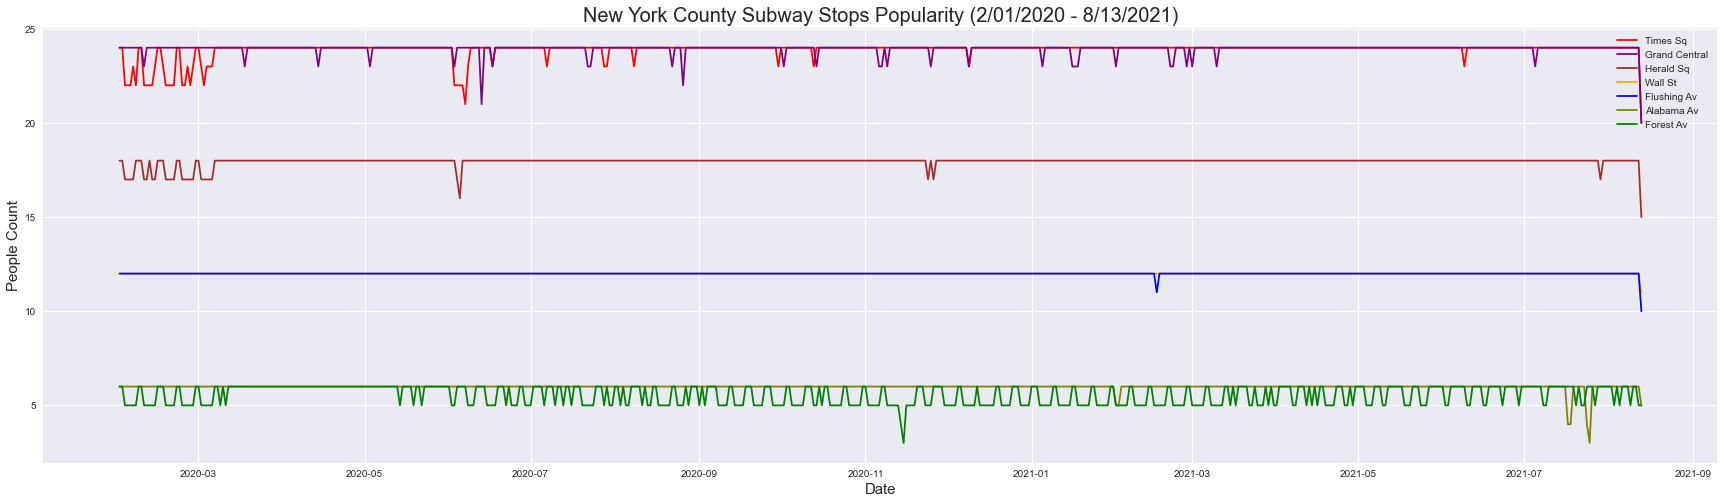

In [290]:
plt.figure(figsize=(30,8))

# plot for each stop
plt.plot(m['Date'], m['Times Sq Count'], color = 'red', label = 'Times Sq')
plt.plot(m['Date'], m['Grand Central Count'], color = 'purple', label = 'Grand Central')
plt.plot(m['Date'], m['Herald Sq Count'], color = 'brown', label = 'Herald Sq')
plt.plot(m['Date'], m['Wall St Count'], color = 'orange', label = 'Wall St')
plt.plot(m['Date'], m['Flushing Av Count'], color = 'blue', label = 'Flushing Av')
plt.plot(m['Date'], m['Alabama Av Count'], color = 'olive', label = 'Alabama Av')
plt.plot(m['Date'], m['Forest Av Count'], color = 'green', label = 'Forest Av')

# title
plt.xlabel('Date', fontsize = 15)
plt.ylabel('People Count', fontsize = 15)
plt.title('New York County Subway Stops Popularity (2/01/2020 - 8/13/2021)', fontsize = 20)

plt.legend()
plt.show()

The popularity of the selected subway stops generally stay the same, and the popularity of those less popular stops fluctuate more.

## Station/ Line/Neighborhood Popularity

Below is the scratch code I used to find station/line/neighborhood popularity, which I found a bit difficult to integrate into my analysis at this point, but I think they might useful for future analysis so I keep them in this notebook

Find connecting lines popularity each day

In [35]:
cline = df2.groupby(['Date','Connecting Lines']).size()
cline

Date        Connecting Lines
2017-02-04  1                   126
            123                  18
            1237ACENQRS          12
            123FLM                4
            1ABCD                 8
                               ... 
2021-08-13  R                    70
            R1                   10
            R2345                 5
            S                     5
            S2345                 5
Length: 170156, dtype: int64

Find all stops popularity each day

In [37]:
stop_name = df2.groupby(['Date', 'Stop Name']).size()
stop_name

Date        Stop Name            
2017-02-04  1 Av                      4
            103 St                   15
            103 St - Corona Plaza     4
            104 St                    8
            110 St                    4
                                     ..
2021-08-13  Woodhaven Blvd           10
            Woodlawn                  5
            Woodside - 61 St          5
            York St                   5
            Zerega Av                 5
Length: 569129, dtype: int64

Find neighborhood popularity each day

In [38]:
neighborhood = df2.groupby(['Date', 'Neighborhood']).size()
neighborhood

Date        Neighborhood             
2017-02-04  Astoria                      51
            Bay Ridge/Dyker Heights      16
            Bedford Stuyvesant           27
            Bensonhurst                  56
            Borough Park                 37
                                         ..
2021-08-13  Upper East Side              60
            Upper West Side              86
            Washington Heights/Inwood    70
            Williamsbridge/Baychester    40
            Woodside/Sunnyside           64
Length: 84252, dtype: int64

Get the neighborhood popularity count data

In [44]:
counts = df2.groupby(['Date', 'Neighborhood']).agg(len)
counts

Unique ID  Stop Name  Remote Unit  Line  \
Date       Neighborhood                                                         
2017-02-04 Astoria                           51         51           51    51   
           Bay Ridge/Dyker Heights           16         16           16    16   
           Bedford Stuyvesant                27         27           27    27   
           Bensonhurst                       56         56           56    56   
           Borough Park                      37         37           37    37   
...                                         ...        ...          ...   ...   
2021-08-13 Upper East Side                   60         60           60    60   
           Upper West Side                   86         86           86    86   
           Washington Heights/Inwood         70         70           70    70   
           Williamsbridge/Baychester         40         40           40    40   
           Woodside/Sunnyside                64         64           64    64   

                                      Connecting Lines  Daytime Routes  \
Date       Neighborhood                                                  
2017-02-04 Astoria                                  51              51   
           Bay Ridge/Dyker Heights                  16              16   
           Bedford Stuyvesant                       27              27   
           Bensonhurst                              56              56   
           Borough Park                             37              37   
...                                                ...             ...   
2021-08-13 Upper East Side                          60              60   
           Upper West Side                          86              86   
           Washington Heights/Inwood                70              70   
           Williamsbridge/Baychester                40              40   
           Woodside/Sunnyside                       64              64   

                                      North Direction Label  \
Date       Neighborhood                                       
2017-02-04 Astoria                                       51   
           Bay Ridge/Dyker Heights                       16   
           Bedford Stuyvesant                            27   
           Bensonhurst                                   56   
           Borough Park                                  37   
...                                                     ...   
2021-08-13 Upper East Side                               60   
           Upper West Side                               86   
           Washington Heights/Inwood                     70   
           Williamsbridge/Baychester                     40   
           Woodside/Sunnyside                            64   

                                      South Direction Label  Division  \
Date       Neighborhood                                                 
2017-02-04 Astoria                                       51        51   
           Bay Ridge/Dyker Heights                       16        16   
           Bedford Stuyvesant                            27        27   
           Bensonhurst                                   56        56   
           Borough Park                                  37        37   
...                                                     ...       ...   
2021-08-13 Upper East Side                               60        60   
           Upper West Side                               86        86   
           Washington Heights/Inwood                     70        70   
           Williamsbridge/Baychester                     40        40   
           Woodside/Sunnyside                            64        64   

                                      Structure  Borough  Latitude  Longitude  \
Date       Neighborhood                                                         
2017-02-04 Astoria                           51       51      51.0       51.0   
        